In [1]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read dataset

data = pd.read_csv('candidate.csv', index_col=0)

In [3]:
# read top 10 rows
data.head(10)

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             40 non-null     int64  
 1   gpa              40 non-null     float64
 2   work_experience  40 non-null     int64  
 3   admitted         40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [5]:
# statistical data
data.describe()

,gmat,gpa,work_experience,admitted
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,3.095000,3.425000,0.475000
std,61.427464,0.631218,1.737778,0.505736
min,540.000000,1.700000,1.000000,0.000000
25%,607.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.000000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


<AxesSubplot:xlabel='admitted', ylabel='count'>

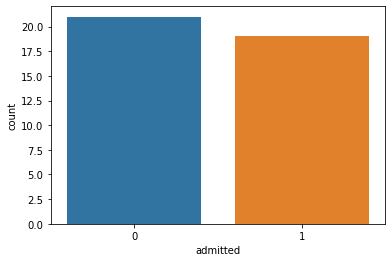

In [107]:
sns.countplot(x='admitted',data=data)

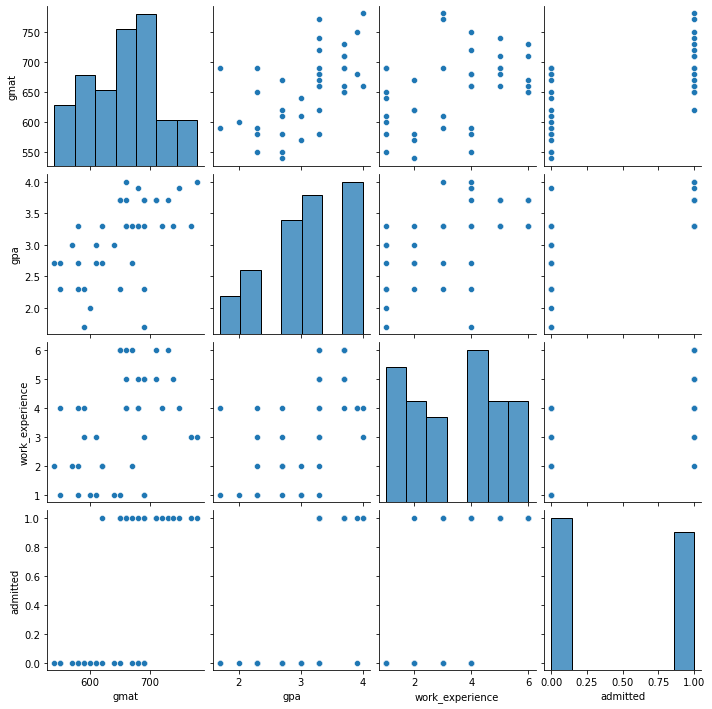

In [108]:
sns.pairplot(data,dropna=True)

In [6]:
#split the data

x= data[['gmat']]

In [7]:
x

,gmat
0,780
1,750
2,690
3,710
4,680
5,730
6,690
7,720
8,740
9,690


In [8]:
y = data[['admitted']]

In [9]:
y  #actual labels

,admitted
0,1
1,1
2,0
3,1
4,0
5,1
6,0
7,1
8,1
9,0


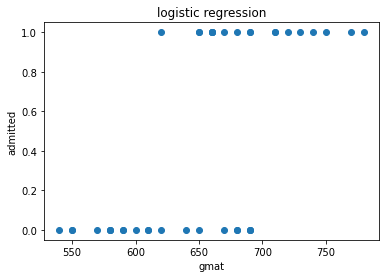

In [10]:
#EDA

plt.scatter(x,y) # scatter plot
plt.xlabel('gmat')
plt.ylabel('admitted')
plt.title('logistic regression')
plt.show()

In [11]:
#import model

from sklearn.linear_model import LogisticRegression

In [12]:
model =  LogisticRegression()  #initialization

In [13]:
model

LogisticRegression()

In [14]:
model.fit(x,y)

/home/hellovk04/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [15]:
y_predict =  model.predict(x)  #prediction values

In [16]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [17]:
pred=pd.DataFrame(y_predict)

In [18]:
pred

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [23]:

X_train.shape, X_test.shape , y_test.shape , y_train.shape

((32, 1), (8, 1), (8, 1), (32, 1))

In [24]:
#model.fit(X_train)

X_train

,gmat
39,690
6,690
25,670
9,690
13,680
31,620
34,680
8,740
17,650
24,570


In [25]:
y_train

,admitted
39,1
6,0
25,1
9,0
13,0
31,0
34,1
8,1
17,1
24,0


In [26]:
X_test

,gmat
19,590
16,580
15,610
26,660
4,680
12,710
37,580
27,580


In [27]:
y_test

,admitted
19,0
16,0
15,0
26,1
4,0
12,1
37,0
27,0


In [28]:
model.fit(X_train, y_train)

/home/hellovk04/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [29]:
y_predict = model.predict(X_test)

In [30]:
y_predict

array([0, 0, 0, 1, 1, 1, 0, 0])

In [31]:
from sklearn.metrics import accuracy_score, recall_score, precision_score ,f1_score , confusion_matrix

In [32]:
confusion_matrix(y_true=y_test, y_pred=y_predict)

array([[5, 1],
       [0, 2]])

In [33]:
#pd.crosstab(y_test, y_predict)

In [34]:
accuracy_score(y_true=y_test, y_pred=y_predict)

0.875

In [35]:
recall_score(y_true=y_test, y_pred=y_predict)

1.0

In [36]:
precision_score(y_true=y_test, y_pred=y_predict)

0.6666666666666666

In [37]:
f1_score(y_true=y_test, y_pred=y_predict)

0.8

In [38]:
import seaborn as sns

/home/hellovk04/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


<AxesSubplot:xlabel='gpa', ylabel='admitted'>

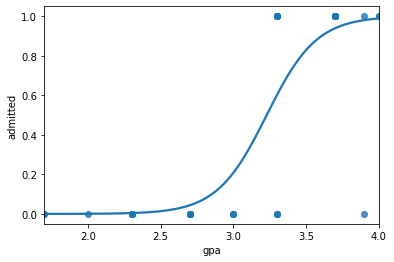

In [39]:
sns.regplot(x='gpa', y='admitted', data=data , logistic=True)

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
bayes=GaussianNB()

In [45]:
bayes.fit(X_train,y_train)

/home/hellovk04/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [47]:
bayes_pred=bayes.predict(X_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,bayes_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.67      1.00      0.80         2

    accuracy                           0.88         8
   macro avg       0.83      0.92      0.85         8
weighted avg       0.92      0.88      0.88         8



In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc=RandomForestClassifier()

In [53]:
rfc.fit(X_train,y_train)

<ipython-input-53-0b00acaf8842>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier()

In [54]:
rfc_pred=rfc.predict(X_test)

In [58]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.67      1.00      0.80         2

    accuracy                           0.88         8
   macro avg       0.83      0.92      0.85         8
weighted avg       0.92      0.88      0.88         8



In [59]:
from sklearn.svm import SVC

In [60]:
svm=SVC()

In [61]:
svm.fit(X_train,y_train)

/home/hellovk04/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [63]:
svm_pred=svm.predict(X_test)

In [64]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.67      1.00      0.80         2

    accuracy                           0.88         8
   macro avg       0.83      0.92      0.85         8
weighted avg       0.92      0.88      0.88         8



In [77]:
# k-neirest neighbors
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn=KNeighborsClassifier(n_neighbors=3)

In [73]:
knn.fit(X_train,y_train)

<ipython-input-73-889312abc571>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [75]:
knn_pred=knn.predict(X_test)

In [95]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

